In [7]:
library(ggplot2)
library(cowplot)

In [71]:
## MOFA (pv2)
x = c(8.465845e-10,  2.912894e-02, 3.468064e-10,  0.005462, 0.348159, 0.092094, 0.018068, 0.202231, 0.375638, 0.720105, 0.471773, 
     3.969373e-13, 5.576247e-13, 0.208862, 0.656033, 0.353284, 0.006725, 0.888190, 0.000003, 0.011491, 1.328878e-11, 6.727592e-12,
     0.436182, 0.686520, 2.398976e-17,  1.300539e-11, 3.080535e-10, 3.930914e-09, 0.318595, 0.057419, 0.011458, 0.914385, 0.971026, 0.057087,
     0.038254, 0.000005, 0.419376, 0.145234, 0.25096)
## PCA same settings (pv1)
y0 = c(3.925165e-08, 1.479959e-01, 0.000002, 0.000013, 0.506967, 0.623026, 0.573080, 0.617558, 0.010549, 0.063797,  0.737298, 
      4.305688e-08, 4.265852e-08,  0.496111, 0.113183, 0.770560, 0.006461, 0.843212, 0.000083, 0.790454, 0.371885, 0.000005,
      0.002163, 0.000973, 0.002189, 2.790155e-01, 1.607384e-05, 7.375778e-07, 0.167699, 0.076387, 0.016253, 0.151978, 0.399287, 0.000248,
      0.060604, 0.001412, 0.027694, 3.246701e-13, 0.235666)
## PCA new settings (pv3)
y1 = c(2.621800e-09, 1.523839e-01, 7.361991e-07, 0.000091,  0.150256, 0.208150, 0.071290,  0.103972, 0.594653, 0.873261, 0.880462, 
    5.975197e-11, 6.204527e-11, 0.073163, 0.522266, 0.157959, 0.000009, 0.771356,  0.000026, 0.015247, 0.000002,  0.000001,
      0.068251, 0.344028, 1.544407e-11, 5.245872e-07, 7.264206e-06, 1.030548e-07, 0.032324, 0.660564, 0.026923, 0.761398, 0.941789, 0.027940,
      0.138652, 0.000231, 0.123492, 0.212339, 0.099479)

In [72]:
df_plot = data.frame(x=x, y0=y0)
df_plot = data.frame(x=x, y0=y0, y1=y1)

In [73]:
cor.test(x,y0)
cor.test(-log10(x),-log10(y0))


	Pearson's product-moment correlation

data:  x and y0
t = 1.6918, df = 37, p-value = 0.09909
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.05195239  0.53798969
sample estimates:
     cor 
0.267957 



	Pearson's product-moment correlation

data:  -log10(x) and -log10(y0)
t = 3.1839, df = 37, p-value = 0.002945
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1736299 0.6797926
sample estimates:
      cor 
0.4637417 


In [74]:
cor.test(x,y1)
cor.test(-log10(x),-log10(y1))


	Pearson's product-moment correlation

data:  x and y1
t = 8.5192, df = 37, p-value = 2.991e-10
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6704945 0.8986121
sample estimates:
      cor 
0.8138414 



	Pearson's product-moment correlation

data:  -log10(x) and -log10(y1)
t = 17.506, df = 37, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8961761 0.9707860
sample estimates:
      cor 
0.9445993 


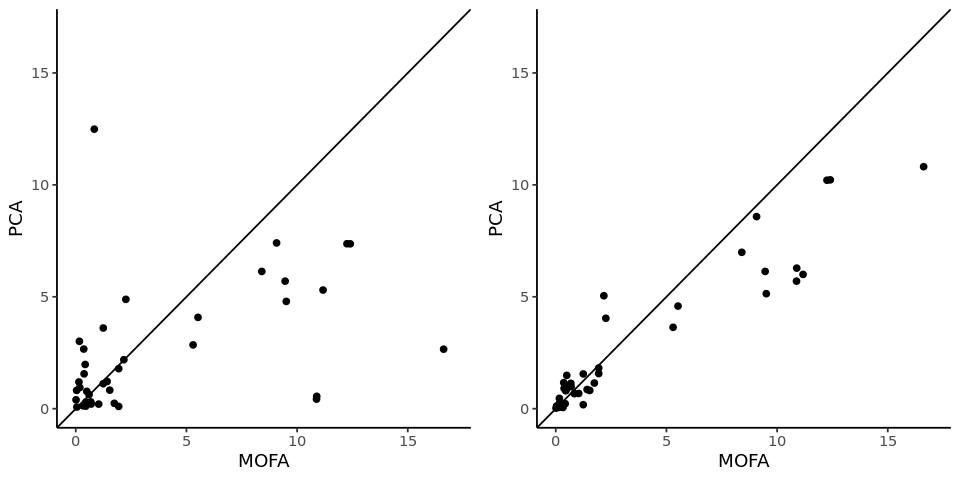

In [75]:
options(repr.plot.width = 8, repr.plot.height = 4)
p0 = ggplot(df_plot, aes(x=-log10(x), y=-log10(y0))) + geom_point() + theme_classic() + geom_abline()
p0 = p0 + xlab("MOFA") + ylab("PCA") + xlim(c(0,17)) + ylim(c(0,17))
p1 = ggplot(df_plot, aes(x=-log10(x), y=-log10(y1))) + geom_point() + theme_classic() + geom_abline()
p1 = p1 + xlab("MOFA") + ylab("PCA") + xlim(c(0,17)) + ylim(c(0,17))
plot_grid(p0,p1,ncol=2)

In [85]:
endo_folder = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/debug_May2021/"

In [89]:
mofa_filename = paste0(endo_folder, 'MOFA10/new4/summary.csv')
mofa = read.csv(mofa_filename, row.names=1)
mofa$gene_name = mofa$gene
mofa$gene = gsub("_.*","",mofa$gene)
mofa = mofa[mofa$chrom == 22,]
head(mofa,2)
nrow(mofa)

,gene,n_snps,chrom,pv_raw,snpID,pv,gene_name
15,ENSG00000189306,3,22,0.09209385,22_42896474_T_C,0.2762815,ENSG00000189306_RRP7A
16,ENSG00000189306,3,22,0.01806787,22_42897414_A_C,0.0542036,ENSG00000189306_RRP7A


[1] 121

In [90]:
pca0_filename = paste0(endo_folder,"REVISION/CRM_int_PCA/summary.csv")
pca0 = read.csv(pca0_filename, row.names=1)
pca0 = pca0[pca0$chrom == 22,]
head(pca0,2)
nrow(pca0)

,gene,n_snps,chrom,pv_raw,snpID
15,ENSG00000189306,3,22,0.6230256,22_42896474_T_C
16,ENSG00000189306,3,22,0.5730801,22_42897414_A_C


[1] 121

In [100]:
pca1_filename = paste0(endo_folder,"REVISION/CRM_int_PCA/summary_new.csv")
pca1 = read.csv(pca1_filename)
pca1$snpID = pca1$variant
pca1$pv_raw = pca1$pv
pca1$gene_name = pca1$gene
pca1$gene = gsub("_.*","",pca1$gene)
pca1$X <- c()
head(pca1,2)
nrow(pca1)

chrom,gene,pv,variant,snpID,pv_raw,gene_name
22,ENSG00000100058,6.129443e-10,22_25845855_C_G,22_25845855_C_G,6.129443e-10,ENSG00000100058_CRYBB2P1
22,ENSG00000100058,1.097532e-02,22_25924999_G_A,22_25924999_G_A,1.097532e-02,ENSG00000100058_CRYBB2P1


[1] 121

In [102]:
library(dplyr)
df0 = inner_join(mofa, pca0, by=c("snpID","gene"), suffix=c(".m",".p"))
df1 = inner_join(mofa, pca1, by=c("snpID","gene"), suffix=c(".m",".p"))

In [99]:
x = df0$pv_raw.m
y0 = df0$pv_raw.p
cor.test(x,y0)
cor.test(-log10(x),-log10(y0))


	Pearson's product-moment correlation

data:  x and y0
t = 5.6103, df = 119, p-value = 1.337e-07
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.3036477 0.5878612
sample estimates:
      cor 
0.4573555 



	Pearson's product-moment correlation

data:  -log10(x) and -log10(y0)
t = 4.3281, df = 119, p-value = 3.151e-05
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.2037023 0.5134846
sample estimates:
      cor 
0.3687896 


In [103]:
x = df1$pv_raw.m
y1 = df1$pv_raw.p
cor.test(x,y1)
cor.test(-log10(x),-log10(y1))


	Pearson's product-moment correlation

data:  x and y1
t = 17.412, df = 119, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7881364 0.8911226
sample estimates:
      cor 
0.8474184 



	Pearson's product-moment correlation

data:  -log10(x) and -log10(y1)
t = 31.974, df = 119, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9240385 0.9623540
sample estimates:
      cor 
0.9464326 


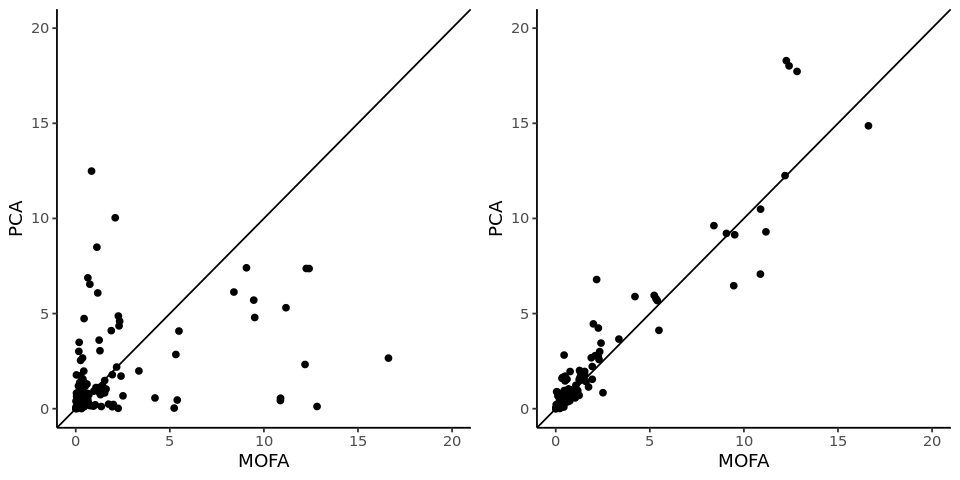

In [107]:
options(repr.plot.width = 8, repr.plot.height = 4)
p0 = ggplot(df0, aes(x=-log10(pv_raw.m), y=-log10(pv_raw.p))) + geom_point() + theme_classic() + geom_abline()
p0 = p0 + xlab("MOFA") + ylab("PCA") + xlim(c(0,20)) + ylim(c(0,20))
p1 = ggplot(df1, aes(x=-log10(pv_raw.m), y=-log10(pv_raw.p))) + geom_point() + theme_classic() + geom_abline()
p1 = p1 + xlab("MOFA") + ylab("PCA") + xlim(c(0,20)) + ylim(c(0,20))
plot_grid(p0,p1,ncol=2)

In [ ]:
##### LDVAE

In [297]:
## MOFA (pv2)
x = c(8.465845e-10,  2.912894e-02, 3.468064e-10,  0.005462, 0.348159, 0.092094, 0.018068, 0.202231, 0.375638, 
    0.720105, 0.471773, 3.969373e-13, 5.576247e-13, 0.208862, 0.656033, 0.353284, 0.006725, 0.888190, 0.000003, 
    0.011491, 1.328878e-11, 6.727592e-12, 0.436182, 0.686520, 2.398976e-17,  1.300539e-11, 3.080535e-10, 
    3.930914e-09, 0.318595, 0.057419, 0.011458, 0.914385, 0.971026, 0.057087,0.038254, 0.000005, 0.419376, 
    0.145234)#, 0.25096)

In [298]:
## LDVAE same settings (pv1)
y0 = c(1.103523e-07, 9.014011e-02, 0.000746, 0.000141, 0.316305, 0.015920, 0.004250, 0.113659, 0.258806, 0.342259,
      0.169668, 1.945436e-11, 8.723618e-12, 0.000201, 0.307953, 0.033377, 0.000003, 0.775450, 0.075479, 0.461629,
      0.034528, 0.000027, 0.175667, 0.440837, 2.674606e-07, 0.000772, 0.000173, 0.066520, 0.129119, 0.020621,
      0.003417, 0.647512, 0.454538, 0.137590, 2.631526e-03, 6.865877e-07, 0.047961, 0.147208)
## LDVAE new settings (pv3)
y1 = c(1.913650e-07, 1.247358e-01, 0.000003, 0.000080, 0.266093, 0.063700, 0.010664, 0.105129, 0.452147, 0.622567,
      0.656348, 2.010416e-14, 2.503091e-15, 0.000036, 0.395675, 0.010078, 0.000001, 0.810282,  0.179800, 0.810958,
      0.011071, 0.000676, 0.035383, 0.225566, 4.862919e-08, 0.000266, 0.000696, 0.008577, 0.11841, 0.129038,
      0.00625, 0.510671, 0.407241, 0.032559, 0.005250, 0.000002, 0.230244, 0.22723)

In [299]:
df_plot = data.frame(x=x, y0=y0, y1=y1)

In [300]:
cor.test(x,y0)
cor.test(-log10(x),-log10(y0))


	Pearson's product-moment correlation

data:  x and y0
t = 8.7997, df = 36, p-value = 1.684e-10
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6883493 0.9064766
sample estimates:
      cor 
0.8262198 



	Pearson's product-moment correlation

data:  -log10(x) and -log10(y0)
t = 6.0765, df = 36, p-value = 5.492e-07
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.5072871 0.8401428
sample estimates:
      cor 
0.7115737 


In [301]:
cor.test(x,y1)
cor.test(-log10(x),-log10(y1))


	Pearson's product-moment correlation

data:  x and y1
t = 5.5947, df = 36, p-value = 2.42e-06
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.4632945 0.8223673
sample estimates:
      cor 
0.6819726 



	Pearson's product-moment correlation

data:  -log10(x) and -log10(y1)
t = 5.9482, df = 36, p-value = 8.149e-07
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.4959825 0.8356424
sample estimates:
      cor 
0.7040358 


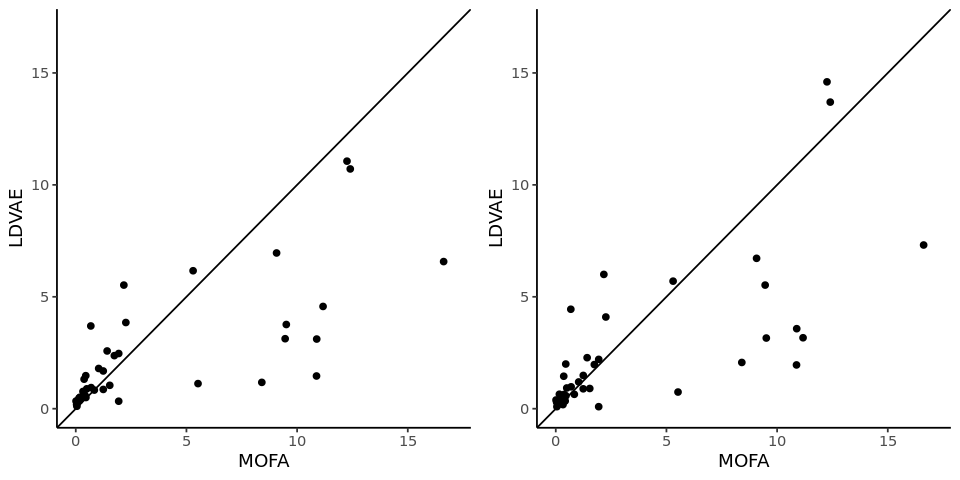

In [302]:
options(repr.plot.width = 8, repr.plot.height = 4)
p0 = ggplot(df_plot, aes(x=-log10(x), y=-log10(y0))) + geom_point() + theme_classic() + geom_abline()
p0 = p0 + xlab("MOFA") + ylab("LDVAE") + xlim(c(0,17)) + ylim(c(0,17))
p1 = ggplot(df_plot, aes(x=-log10(x), y=-log10(y1))) + geom_point() + theme_classic() + geom_abline()
p1 = p1 + xlab("MOFA") + ylab("LDVAE") + xlim(c(0,17)) + ylim(c(0,17))
plot_grid(p0,p1,ncol=2)

In [134]:
##### ZINB-WaVE

In [303]:
## MOFA (pv2)
x = c(8.465845e-10,  2.912894e-02, 3.468064e-10,  0.005462, 0.348159, 0.092094, 0.018068, 0.202231, 0.375638, 
    0.720105, 0.471773, 3.969373e-13, 5.576247e-13, 0.208862, 0.656033, 0.353284, 0.006725, 0.888190, 0.000003, 
    0.011491, 1.328878e-11, 6.727592e-12, 0.436182, 0.686520, 2.398976e-17,  1.300539e-11, 3.080535e-10, 
    3.930914e-09) #, 0.318595, 0.057419, 0.011458, 0.914385, 0.971026, 0.057087,0.038254, 0.000005, 0.419376, 
#     0.145234, 0.25096)

In [304]:
## ZINB-WaVE (20) same settings (pv1)
y0 = c(0.000227, 0.000299, 0.004444, 0.006490, 0.315256, 0.270620, 0.194964, 0.333722, 0.433283, 0.545358, 0.831145,
      2.684268e-07, 2.689159e-07, 0.402423, 0.878783, 0.770453, 0.000496, 0.245226, 0.070487, 0.877384, 0.000024,
      0.000013, 0.351221, 0.537747, 0.000225, 0.000029, 0.000025, 0.000201)
## ZINB-WaVE (20) new settings (pv3)
y1 = c(0.001059, 0.001897, 0.000075, 0.000045, 0.101570, 0.317662, 0.212744, 0.407638, 0.557635, 0.771609, 0.735114,
      1.992701e-11, 3.494003e-12, 0.414160, 0.863323, 0.564085, 0.000002, 0.225704, 0.194276, 0.967329, 1.989394e-07,
      6.179765e-08, 0.068333, 0.203602, 2.605026e-10, 1.923257e-07, 1.171127e-07, 5.588892e-06)

In [305]:
df_plot = data.frame(x=x, y0=y0, y1=y1)

In [306]:
cor.test(x,y0)
cor.test(-log10(x),-log10(y0))


	Pearson's product-moment correlation

data:  x and y0
t = 4.3004, df = 26, p-value = 0.0002128
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.3576522 0.8204448
sample estimates:
     cor 
0.644705 



	Pearson's product-moment correlation

data:  -log10(x) and -log10(y0)
t = 8.5059, df = 26, p-value = 5.497e-09
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7126562 0.9324119
sample estimates:
      cor 
0.8576934 


In [307]:
cor.test(x,y1)
cor.test(-log10(x),-log10(y1))


	Pearson's product-moment correlation

data:  x and y1
t = 3.192, df = 26, p-value = 0.003675
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1964197 0.7543579
sample estimates:
      cor 
0.5306134 



	Pearson's product-moment correlation

data:  -log10(x) and -log10(y1)
t = 9.8074, df = 26, p-value = 3.174e-10
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7685786 0.9468920
sample estimates:
      cor 
0.8872472 


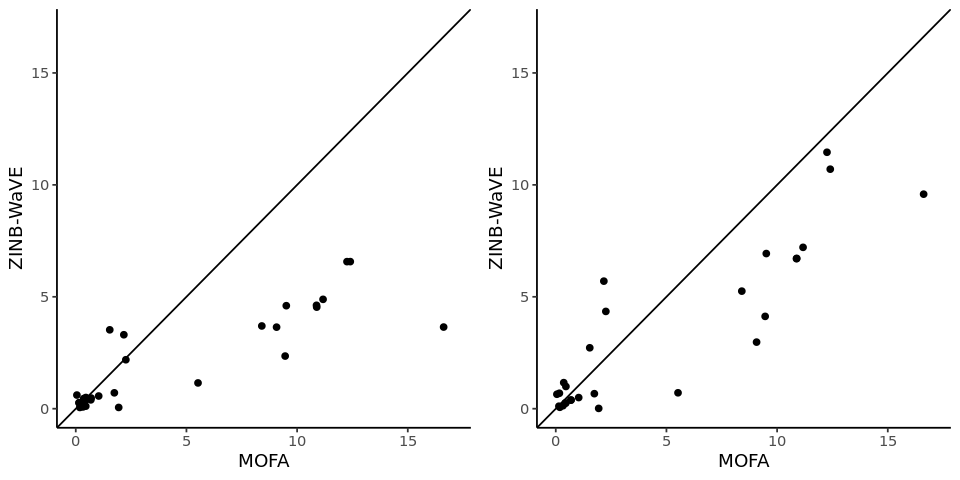

In [308]:
options(repr.plot.width = 8, repr.plot.height = 4)
p0 = ggplot(df_plot, aes(x=-log10(x), y=-log10(y0))) + geom_point() + theme_classic() + geom_abline()
p0 = p0 + xlab("MOFA") + ylab("ZINB-WaVE") + xlim(c(0,17)) + ylim(c(0,17))
p1 = ggplot(df_plot, aes(x=-log10(x), y=-log10(y1))) + geom_point() + theme_classic() + geom_abline()
p1 = p1 + xlab("MOFA") + ylab("ZINB-WaVE") + xlim(c(0,17)) + ylim(c(0,17))
plot_grid(p0,p1,ncol=2)

In [309]:
zw_filename = paste0(endo_folder,"REVISION/CRM_int_ZINB-WaVE/summary_new.csv")
zw = read.csv(zw_filename)
zw$snpID = zw$variant
zw$pv_raw = zw$pv
zw$gene_name = zw$gene
zw$gene = gsub("_.*","",zw$gene)
zw$X <- c()
head(zw,2)
nrow(zw)

chrom,gene,pv,variant,snpID,pv_raw,gene_name
22,ENSG00000100058,6.129443e-10,22_25845855_C_G,22_25845855_C_G,6.129443e-10,ENSG00000100058_CRYBB2P1
22,ENSG00000100058,1.097532e-02,22_25924999_G_A,22_25924999_G_A,1.097532e-02,ENSG00000100058_CRYBB2P1


[1] 119

In [310]:
df1 = inner_join(mofa, zw, by=c("snpID","gene"), suffix=c(".m",".z"))

In [311]:
x = df1$pv_raw.m
y1 = df1$pv_raw.z
cor.test(x,y1)
cor.test(-log10(x),-log10(y1))


	Pearson's product-moment correlation

data:  x and y1
t = 16.942, df = 117, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7814161 0.8881196
sample estimates:
      cor 
0.8428619 



	Pearson's product-moment correlation

data:  -log10(x) and -log10(y1)
t = 31.616, df = 117, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9234277 0.9622752
sample estimates:
      cor 
0.9461594 


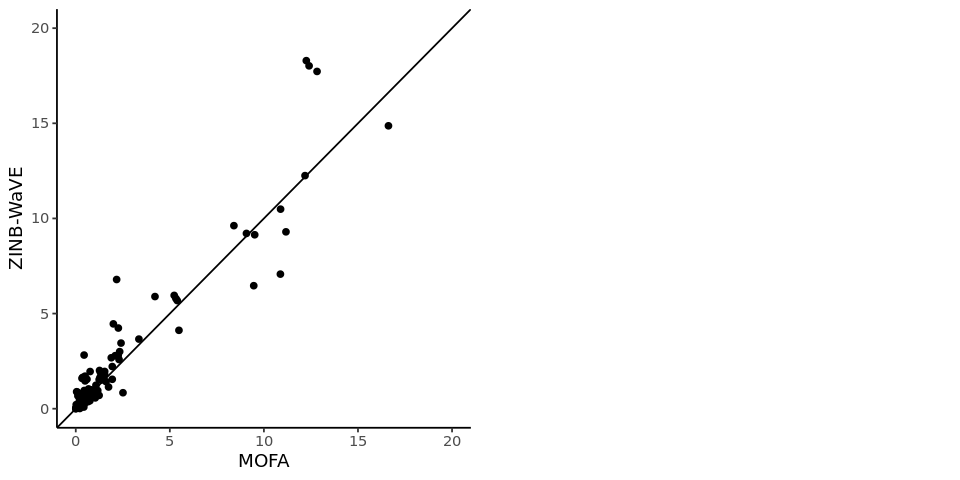

In [314]:
options(repr.plot.width = 8, repr.plot.height = 4)
p1 = ggplot(df1, aes(x=-log10(pv_raw.m), y=-log10(pv_raw.z))) + geom_point() + theme_classic() + geom_abline()
p1 = p1 + xlab("MOFA") + ylab("ZINB-WaVE") + xlim(c(0,20)) + ylim(c(0,20))
plot_grid(p1,ncol=2)